In [271]:
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import copy

#PART 2

In [272]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train_image = copy.deepcopy(x_train)
x_train = x_train[:1000].reshape(1000, 28 * 28)
y_train = y_train[:1000]
weights = np.random.random((225,784))

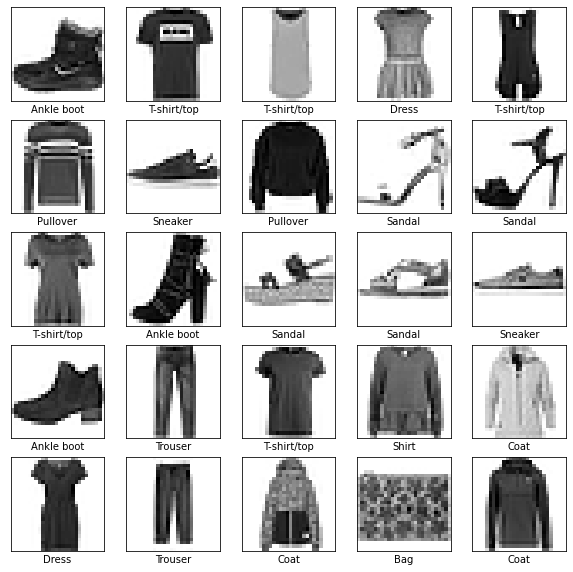

In [273]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()



In [274]:
print(weights.shape)

#initial learning rate
alpha = 0.6
decay_alpha = 0.5

# Initial neighbour radius
R = 0

# Normalize Input
x_train = x_train / 255.0
x_test = x_test / 255.0
y_test = y_test[:3000]
x_test = x_test[:3000].reshape(3000, 28 * 28)

(225, 784)


In [306]:
# Return the (g,h) index of the BMU in the grid
rand = np.random.RandomState(644)
def find_BMU(SOM,x):
    Dj = []
    for i in range(SOM.shape[0]):
      for j in range(SOM.shape[1]):
        Dj.append(np.sum(np.square(SOM[i,j,:]-x)))
    J = np.argmin(Dj)
    g,h = np.unravel_index(J, (15,15))
    return g,h
    #distSq = (np.square(SOM - x)).sum(axis=2)
    #return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, 
                   BMU_coord, step):
    g, h = BMU_coord
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step+1)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step+1)):
            dist_sq = np.square(i - g) + np.square(j - h)
            SOM[i,j,:] += learn_rate * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = 0.4, 
             lr_decay = .1, epochs = 20):    
    learn_rate_0 = learn_rate
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, (g,h),step=1)
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
    return SOM
def predict(SOM,x_test):
  y_pred = []
  for x in x_test:
    Dj = []
    for i in range(SOM.shape[0]):
      for j in range(SOM.shape[1]):
        Dj.append(np.sum(np.square(SOM[i,j,:]-x)))
    J = np.argmin(Dj)
    y_pred.append(J)
  return y_pred

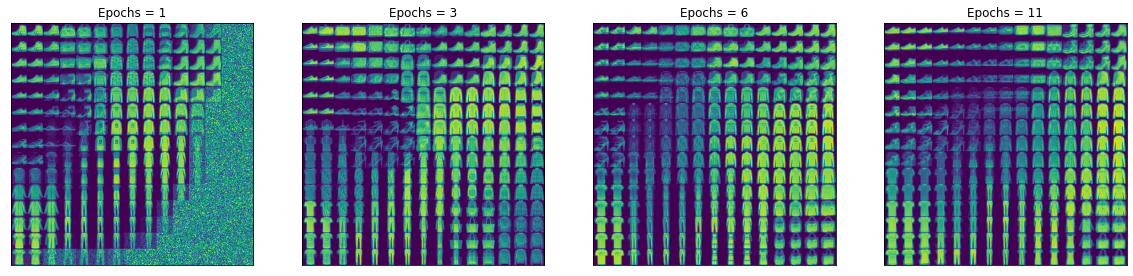

In [308]:
weights = np.random.random((15,15,784))
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(20,20), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1,2,3,5], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(weights, x_train, epochs=epochs)
    SOM2=SOM.reshape(15,15,28,28)
    SOMM = np.zeros((420,420))
    for k in range (15):
      for l in range(15):
        SOMM[k*28:k*28+28,l*28:28*l+28] = SOM2 [k,l,:,:]
    ax[i].imshow(SOMM)
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

In [277]:
preds = predict(SOM,x_test)

In [278]:
class_count = np.zeros((10,225))
for i in range(len(preds)):
  class_count[y_test[i],preds[i]]+=1

Text(0, 0.5, 'number of assigned')

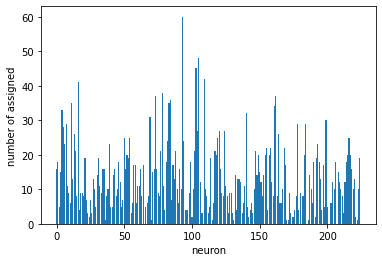

In [279]:
cuntsun = np.sum(class_count,axis=0)
plt.bar(range(225), cuntsun)
plt.xlabel("neuron")
plt.ylabel("number of assigned")

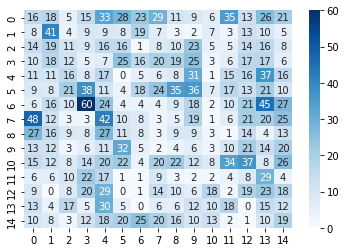

In [280]:
import seaborn as sns
sns.heatmap(cuntsun.reshape(15,15),annot=True,cmap="Blues")

average classes asigned to each neuron: 2.368888888888889


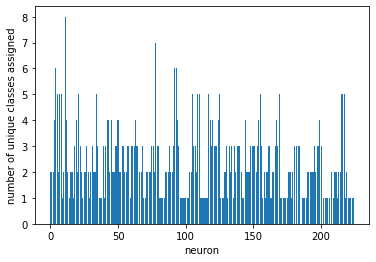

In [281]:
class_count[class_count>=1]=1
cuntsun = np.sum(class_count,axis=0)
plt.bar(range(225), cuntsun)
plt.xlabel("neuron")
plt.ylabel("number of unique classes assigned")
print("average classes asigned to each neuron:",np.mean(cuntsun))

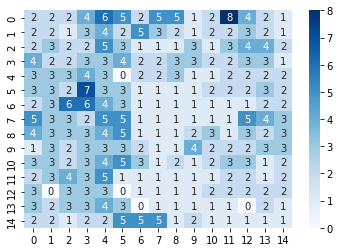

In [282]:
import seaborn as sns
sns.heatmap(cuntsun.reshape(15,15),annot=True,cmap="Blues")

#R=0

In [227]:
# Return the (g,h) index of the BMU in the grid
rand = np.random.RandomState(644)
def find_BMU(SOM,x):
    Dj = []
    for i in range(SOM.shape[0]):
      for j in range(SOM.shape[1]):
        Dj.append(np.sum(np.square(SOM[i,j,:]-x)))
    J = np.argmin(Dj)
    g,h = np.unravel_index(J, (15,15))
    return g,h
    #distSq = (np.square(SOM - x)).sum(axis=2)
    #return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, 
                   BMU_coord, step):
    g, h = BMU_coord
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step+1)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step+1)):
            dist_sq = np.square(i - g) + np.square(j - h)
            SOM[i,j,:] += learn_rate * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = 0.4, 
             lr_decay = .1, epochs = 20):    
    learn_rate_0 = learn_rate
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, (g,h),step=0)
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
    return SOM
def predict(SOM,x_test):
  y_pred = []
  for x in x_test:
    Dj = []
    for i in range(SOM.shape[0]):
      for j in range(SOM.shape[1]):
        Dj.append(np.sum(np.square(SOM[i,j,:]-x)))
    J = np.argmin(Dj)
    y_pred.append(J)
  return y_pred

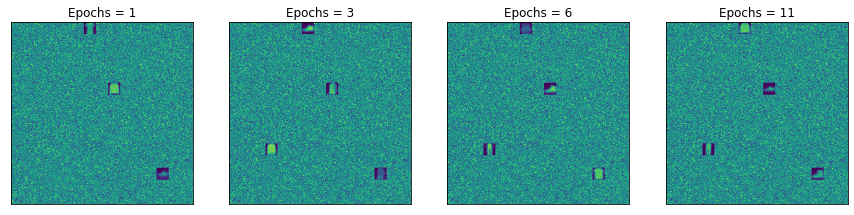

In [228]:
weights = np.random.random((15,15,784))
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1,2,3,5], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(weights, x_train, epochs=epochs)
    SOM2=SOM.reshape(15,15,28,28)
    SOMM = np.zeros((420,420))
    for k in range (15):
      for l in range(15):
        SOMM[k*28:k*28+28,l*28:28*l+28] = SOM2 [k,l,:,:]
    ax[i].imshow(SOMM)
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

#PART 3, R=3 with decay

In [283]:
# Return the (g,h) index of the BMU in the grid
rand = np.random.RandomState(644)
def find_BMU(SOM,x):
    Dj = []
    for i in range(SOM.shape[0]):
      for j in range(SOM.shape[1]):
        Dj.append(np.sum(np.square(SOM[i,j,:]-x)))
    J = np.argmin(Dj)
    g,h = np.unravel_index(J, (15,15))
    return g,h
    #distSq = (np.square(SOM - x)).sum(axis=2)
    #return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, 
                   BMU_coord, step):
    g, h = BMU_coord
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step+1)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step+1)):
            dist_sq = np.square(i - g) + np.square(j - h)
            SOM[i,j,:] += learn_rate * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = 1, 
             lr_decay = 1, epochs = 20):    
    learn_rate_0 = learn_rate
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, (g,h),step=max(0,3-epoch))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
    return SOM
def predict(SOM,x_test):
  y_pred = []
  for x in x_test:
    Dj = []
    for i in range(SOM.shape[0]):
      for j in range(SOM.shape[1]):
        Dj.append(np.sum(np.square(SOM[i,j,:]-x)))
    J = np.argmin(Dj)
    y_pred.append(J)
  return y_pred

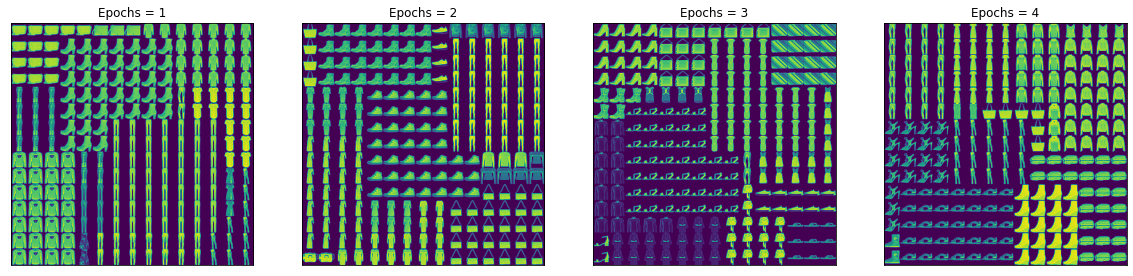

In [298]:
weights = np.random.random((15,15,784))
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(20, 20), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1,1,1,1], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(weights, x_train, epochs=epochs)
    SOM2=SOM.reshape(15,15,28,28)
    SOMM = np.zeros((420,420))
    for k in range (15):
      for l in range(15):
        SOMM[k*28:k*28+28,l*28:28*l+28] = SOM2 [k,l,:,:]
    ax[i].imshow(SOMM)
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

In [291]:
preds = predict(SOM,x_test)

In [292]:
class_count = np.zeros((10,225))
for i in range(len(preds)):
  class_count[y_test[i],preds[i]]+=1

Text(0, 0.5, 'number of assigned')

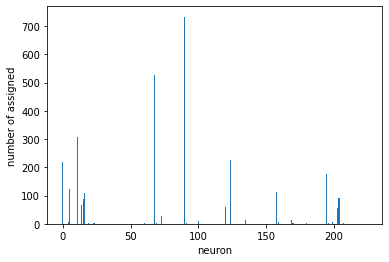

In [293]:
cuntsun = np.sum(class_count,axis=0)
plt.bar(range(225), cuntsun)
plt.xlabel("neuron")
plt.ylabel("number of assigned")

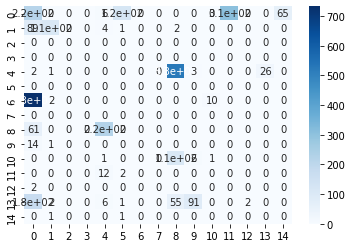

In [294]:
import seaborn as sns
sns.heatmap(cuntsun.reshape(15,15),annot=True,cmap="Blues")

average classes asigned to each neuron: 0.5066666666666667


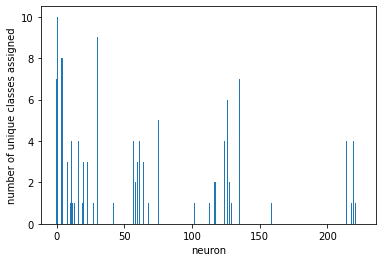

In [289]:
class_count[class_count>=1]=1
cuntsun = np.sum(class_count,axis=0)
plt.bar(range(225), cuntsun)
plt.xlabel("neuron")
plt.ylabel("number of unique classes assigned")
print("average classes asigned to each neuron:",np.mean(cuntsun))

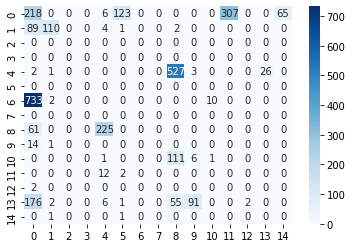

In [304]:
import seaborn as sns
sns.heatmap(cuntsun.reshape(15,15),annot=True,cmap="Blues",fmt="g")